<a href="https://colab.research.google.com/github/thedarkrai9/data-science-notebooks/blob/initial-commit/data-science-school-l1/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries first

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import data

In [3]:
# Import data below into 'df'. This code is for my google drive file
# from google.colab import drive
# drive.mount('/drive')

# Import from github files directly below

df_original = pd.read_csv("https://raw.githubusercontent.com/thedarkrai9/data-science-notebooks/initial-commit/data-science-school-l1/train.csv",index_col=0)
df_test = pd.read_csv("https://raw.githubusercontent.com/thedarkrai9/data-science-notebooks/initial-commit/data-science-school-l1/test.csv",index_col=0)

#Basic analysis of the data

In [4]:
print(df_original.count())
print(df_original.shape)

account_status        600
months                600
credit_history        600
purpose               600
credit_amount         600
savings               600
employment            600
installment_rate      600
personal_status       600
guarantors            600
residence             600
property              600
age                   600
other_installments    600
housing               600
credit_cards          600
job                   600
dependents            600
phone                 600
foreign_worker        600
credit_rating         600
dtype: int64
(600, 21)


In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  600 non-null    int64 
 1   account_status      600 non-null    object
 2   months              600 non-null    int64 
 3   credit_history      600 non-null    object
 4   purpose             600 non-null    object
 5   credit_amount       600 non-null    int64 
 6   savings             600 non-null    object
 7   employment          600 non-null    object
 8   installment_rate    600 non-null    int64 
 9   personal_status     600 non-null    object
 10  guarantors          600 non-null    object
 11  residence           600 non-null    int64 
 12  property            600 non-null    object
 13  age                 600 non-null    int64 
 14  other_installments  600 non-null    object
 15  housing             600 non-null    object
 16  credit_cards        600 no

In [ ]:
df_original.head()

,account_status,months,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,guarantors,residence,property,age,other_installments,housing,credit_cards,job,dependents,phone,foreign_worker,credit_rating
id,,,,,,,,,,,,,,,,,,,,,
1,0 <= x < 200 DM,39,delay in paying off in the past,education,11760,100 <= x < 500 DM,4 <= x < 7 years,2,male - single,none,3,unknown / no property,32,none,rent,1,skilled employee / official,1,"yes, registered under the customers name",yes,1
2,no checking account,36,critical account/ other credits existing (not ...,car (new),6614,x < 100 DM,x>= 7 years,4,male - single,none,4,"car or other, not in attribute Account",34,none,own,2,management/ self-employed/highly qualified emp...,1,"yes, registered under the customers name",yes,1
3,x < 0 DM,30,critical account/ other credits existing (not ...,car (used),6187,100 <= x < 500 DM,4 <= x < 7 years,1,male - married/widowed,none,4,"car or other, not in attribute Account",24,none,rent,2,skilled employee / official,1,none,yes,1
4,no checking account,24,delay in paying off in the past,furniture/equipment,4151,100 <= x < 500 DM,1 <= x < 4 years,2,male - single,none,3,building society savings agreement/ life insur...,35,none,own,2,skilled employee / official,1,none,yes,1
5,x < 0 DM,12,existing credits paid back duly till now,radio/television,709,x < 100 DM,x>= 7 years,4,male - single,none,4,real estate,57,stores,own,1,unskilled - resident,1,none,yes,2


In [ ]:
df_original.nunique()

account_status          4
months                 31
credit_history          5
purpose                10
credit_amount         574
savings                 5
employment              5
installment_rate        4
personal_status         4
guarantors              3
residence               4
property                4
age                    52
other_installments      3
housing                 3
credit_cards            4
job                     4
dependents              2
phone                   2
foreign_worker          2
credit_rating           2
dtype: int64

In [ ]:
print(df_original['property'].unique())

4
['unknown / no property ' 'car or other, not in attribute Account '
 'building society savings agreement/ life insurance ' 'real estate ']


We saw that 3 columns seem to have continuous data and therefore we need to handle them separately (the three columns are: 'months', 'credit_amount', 'age'). Rest seem to be categorical data.

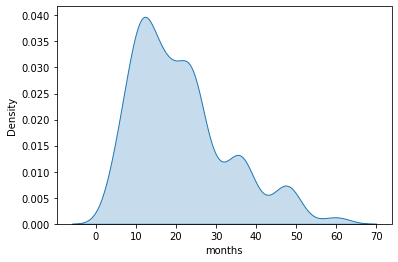

In [ ]:
sns.kdeplot(df_original['months'], shade=True)

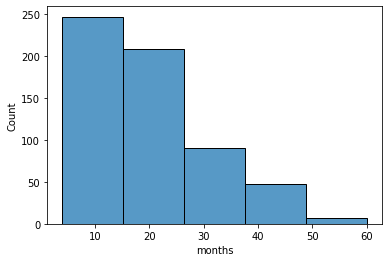

In [ ]:
sns.histplot(df_original['months'], bins=5)

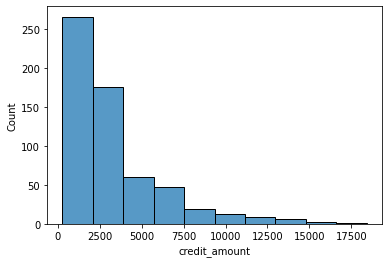

In [ ]:
sns.histplot(df_original['credit_amount'], bins=10) # 10 quantiles

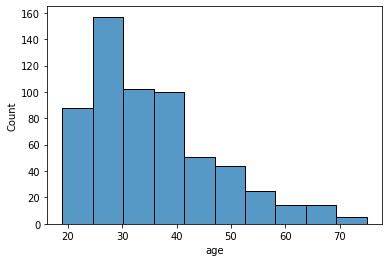

In [ ]:
sns.histplot(df_original['age'], bins=10) # 10 quantiles

#1. Gaussian Naive Bayes

##Data Preprocessing

In [ ]:
df = df_original.copy()

In [ ]:
all_columns = list(df.columns)
all_columns.remove('credit_rating') # Don't need to process the output column
continuous_columns = ['months', 'credit_amount', 'age']
categorical_columns = [ col for col in all_columns if col not in continuous_columns ]

print('Continuous columns: ', continuous_columns)
print('Categorical columns: ', categorical_columns)

Continuous columns:  ['months', 'credit_amount', 'age']
Categorical columns:  ['account_status', 'credit_history', 'purpose', 'savings', 'employment', 'installment_rate', 'personal_status', 'guarantors', 'residence', 'property', 'other_installments', 'housing', 'credit_cards', 'job', 'dependents', 'phone', 'foreign_worker']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in categorical_columns:
  df[col] = le.fit_transform(df[col])

df.head()

,account_status,months,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,guarantors,residence,property,age,other_installments,housing,credit_cards,job,dependents,phone,foreign_worker,credit_rating
id,,,,,,,,,,,,,,,,,,,,,
1,0,39,2,4,11760,0,1,1,3,2,2,3,32,1,2,0,1,0,1,1,1
2,1,36,1,1,6614,3,4,3,3,2,3,1,34,1,1,1,0,0,1,1,1
3,2,30,1,2,6187,0,1,0,2,2,3,1,24,1,2,1,1,0,0,1,1
4,1,24,2,5,4151,0,0,1,3,2,2,0,35,1,1,1,1,0,0,1,1
5,2,12,3,7,709,3,4,3,3,2,3,2,57,2,1,0,3,0,0,1,2


In [ ]:
# Alternatively we can use OrdinalEncoder like below
# from sklearn import preprocessing
# oe = preprocessing.OrdinalEncoder()

# oe.fit()

## Model training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

Generate X and y variables from the data

In [ ]:
X = df.drop(columns=['credit_rating']).values
y = df['credit_rating'].values

print(X.shape)
print(y.shape)

(600, 20)
(600,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
score = model.score(X_test, y_test)
print('Accuracy score obtained: ', score)

Accuracy score obtained:  0.6818181818181818


# 2. Categorical Naive Bayes

## Data Preprocessing

In [ ]:
df = df_original.copy()

In [ ]:
all_columns = list(df.columns)
all_columns.remove('credit_rating') # Don't need to process the output column
continuous_columns = ['months', 'credit_amount', 'age']
categorical_columns = [ col for col in all_columns if col not in continuous_columns ]

print('Continuous columns: ', continuous_columns)
print('Categorical columns: ', categorical_columns)

Continuous columns:  ['months', 'credit_amount', 'age']
Categorical columns:  ['account_status', 'credit_history', 'purpose', 'savings', 'employment', 'installment_rate', 'personal_status', 'guarantors', 'residence', 'property', 'other_installments', 'housing', 'credit_cards', 'job', 'dependents', 'phone', 'foreign_worker']


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['months'] = le.fit_transform(pd.qcut(df['months'], 5))
df['credit_amount'] = le.fit_transform(pd.qcut(df['credit_amount'], 10))
df['age'] = le.fit_transform(pd.qcut(df['age'], 10))

for col in categorical_columns:
  df[col] = le.fit_transform(df[col])

df.head()

,account_status,months,credit_history,purpose,credit_amount,savings,employment,installment_rate,personal_status,guarantors,residence,property,age,other_installments,housing,credit_cards,job,dependents,phone,foreign_worker,credit_rating
id,,,,,,,,,,,,,,,,,,,,,
1,0,4,2,4,9,0,1,1,3,2,2,3,4,1,2,0,1,0,1,1,1
2,1,4,1,1,8,3,4,3,3,2,3,1,5,1,1,1,0,0,1,1,1
3,2,3,1,2,8,0,1,0,2,2,3,1,1,1,2,1,1,0,0,1,1
4,1,2,2,5,7,0,0,1,3,2,2,0,5,1,1,1,1,0,0,1,1
5,2,0,3,7,0,3,4,3,3,2,3,2,9,2,1,0,3,0,0,1,2


##Model training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import CategoricalNB

In [ ]:
model = CategoricalNB()

Generate X and y variables from the data

In [ ]:
X = df.drop(columns=['credit_rating']).values
y = df['credit_rating'].values

print(X.shape)
print(y.shape)

(600, 20)
(600,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
model.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
score = model.score(X_test, y_test)
print('Accuracy score obtained: ', score)

Accuracy score obtained:  0.7121212121212122


#3. Mixed Naive Bayes

## Data Preprocessing

In [ ]:
df = df_original.copy()

In [ ]:
all_columns = list(df.columns)
all_columns.remove('credit_rating') # Don't need to process the output column
continuous_columns = ['months', 'credit_amount', 'age']
categorical_columns = [ col for col in all_columns if col not in continuous_columns ]
print('Continuous columns: ', continuous_columns)
print('Categorical columns: ', categorical_columns)

np_continuous = df[continuous_columns].values
df_categorical = df[categorical_columns]
y = df['credit_rating'].values

Continuous columns:  ['months', 'credit_amount', 'age']
Categorical columns:  ['account_status', 'credit_history', 'purpose', 'savings', 'employment', 'installment_rate', 'personal_status', 'guarantors', 'residence', 'property', 'other_installments', 'housing', 'credit_cards', 'job', 'dependents', 'phone', 'foreign_worker']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

np_categorical = oe.fit_transform(df_categorical)

# Combine everything into a single - 3 columns with continuous data first
np_combined = np.hstack((np_continuous, np_categorical))
print(np_final.shape)
print(np_final[0:2])

(600, 20)
[[3.900e+01 1.176e+04 3.200e+01 0.000e+00 2.000e+00 4.000e+00 0.000e+00
  1.000e+00 1.000e+00 3.000e+00 2.000e+00 2.000e+00 3.000e+00 1.000e+00
  2.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00]
 [3.600e+01 6.614e+03 3.400e+01 1.000e+00 1.000e+00 1.000e+00 3.000e+00
  4.000e+00 3.000e+00 3.000e+00 2.000e+00 3.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00]]


##Model training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [ ]:
categorical_model = CategoricalNB()
continuous_model = GaussianNB()

Generate X and y variables from the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np_combined, y, test_size = 0.33, random_state = 0)

In [ ]:
categorical_model.fit(X_train[:,3:], y_train)
continuous_model.fit(X_train[:,0:3], y_train)

#Individual model accuracy
print(categorical_model.score(X_test[:,3:], y_test))
print(continuous_model.score(X_test[:,0:3], y_test))

0.7070707070707071
0.702020202020202


In [ ]:
categorical_train_probs = categorical_model.predict_proba(X_train[:,3:])
continuous_train_probs = continuous_model.predict_proba(X_train[:,0:3])

categorical_test_probs = categorical_model.predict_proba(X_test[:,3:])
continuous_test_probs = continuous_model.predict_proba(X_test[:,0:3])

X_new_train = np.hstack((categorical_train_probs[:,1:2], continuous_train_probs[:,1:2]))
X_new_test = np.hstack((categorical_test_probs[:,1:2], continuous_test_probs[:,1:2]))

In [ ]:
# print(categorical_train_probs[:,1:2].shape)
# print(categorical_train_probs[0:2,1:2])

# # print(X_new_train.shape)
# # print(X_new_train[0:2])

(402, 1)
[[0.25634895]
 [0.23522502]]


In [ ]:
combined_model = GaussianNB()
combined_model.fit(X_new_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
score = combined_model.score(X_new_test, y_test)
print('Accuracy score obtained: ', score)

Accuracy score obtained:  0.7222222222222222


#Final submission (using model 3)

In [ ]:
# Preprocess data first
df = df_test.copy()
all_columns = list(df.columns)
if 'credit_rating' in all_columns: all_columns.remove('credit_rating') # Don't need to process the output column
continuous_columns = ['months', 'credit_amount', 'age']
categorical_columns = [ col for col in all_columns if col not in continuous_columns ]
print('Continuous columns: ', continuous_columns)
print('Categorical columns: ', categorical_columns)

np_continuous = df[continuous_columns].values
df_categorical = df[categorical_columns]

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

np_categorical = oe.fit_transform(df_categorical)

# Combine everything into a single - 3 columns with continuous data first
np_combined = np.hstack((np_continuous, np_categorical))

# Get individual model probabilities
continuous_test_probs = continuous_model.predict_proba(np_combined[:,0:3])
categorical_test_probs = categorical_model.predict_proba(np_combined[:,3:])

# Get input for second model
X_new_test = np.hstack((categorical_test_probs[:,1:2], continuous_test_probs[:,1:2]))

# Get predictions from combined model
y_pred = combined_model.predict(X_new_test)

Continuous columns:  ['months', 'credit_amount', 'age']
Categorical columns:  ['account_status', 'credit_history', 'purpose', 'savings', 'employment', 'installment_rate', 'personal_status', 'guarantors', 'residence', 'property', 'other_installments', 'housing', 'credit_cards', 'job', 'dependents', 'phone', 'foreign_worker']


In [ ]:
df_submission = df.copy()
df_submission['credit_rating'] = y_pred
df_submission = df_submission[['credit_rating']]

# print(df_submission.info())
# print(df_submission.head())

df_submission.to_csv("/drive/My Drive/Data Science School L1 (Aug-Sep 2021)/Capstone Project/prediction.csv")